In [6]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as mat
from statsmodels.tsa.api import VAR
from statsmodels.stats.stattools import durbin_watson
import numpy as np
data_c=pd.read_csv("/content/drive/My Drive/projectDeng/trains.csv")
data_lc=pd.read_csv("/content/drive/My Drive/projectDeng/label.csv")
datat=data_c.copy()
datal=data_lc.copy()
# def removenull(datas):
#   for col in datas:
#       if(col!="city" and col!="week_start_date"):
#           datas[col].fillna(round(datas[col].mean(),6),inplace=True)
  
#   return datas
# def doremovenull(dataq):
#   num_of_rows=dataq['ndvi_ne'].count()
#   print(num_of_rows)
#   for i in range(0,num_of_rows):
#     if(pd.isna(dataq.iloc[i]['ndvi_ne'])):
#       f_found=i
#       first=i-1
#       countna=0
#       for j in range(f_found,num_of_rows):
#         countna=countna+1
#         if(not pd.isna(dataq.iloc[j]['ndvi_ne'])):
#           l_found=j
#           break
 
#       dataq['ndvi_ne'][f_found:l_found].fillna((dataq.iloc[first]['ndvi_ne']+dataq.iloc[l_found]['ndvi_ne'])/2,inplace=True)
#   return dataq
   
#doremovenull(datat)
 
#print(datat['ndvi_ne'][0:20])
 
#print(data_c['ndvi_ne'][0:20])
def removenull(dataq):
  for col in dataq:
    if(col!="city" and col!="week_start_date"):
      num_of_rows=dataq[col].count()
      for i in range(0,num_of_rows):
        if(pd.isna(dataq.iloc[i][col])):
          f_found=i
          first=i-1
          countna=0
          for j in range(f_found,num_of_rows):
            countna=countna+1
            if(not pd.isna(dataq.iloc[j][col])):
              l_found=j
              break
          dataq[col][f_found:l_found].fillna((dataq.iloc[first][col]+dataq.iloc[l_found][col])/2,inplace=True)
  return dataq
removenull(datat)
#print(datat[['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','precipitation_amt_mm','reanalysis_air_temp_k']][225:250])
print(pd.isna(datat['ndvi_ne']==True))
def dovisual(data1,dat2):
 y=dat2.total_cases
 for col in data1:
   x=data1[col]
   if(col!="city" and col!="week_start_date"):
     mat.plot(((x/datat[col].mean())*100),y,"o")
     mat.show()
 
#print(datat.head())
 
# x=datat.ndvi_ne
# y=datal.total_cases
# z=datat.station_max_temp_c
# a=datal.total_cases
# x=pd.isnull(datat["ndvi_ne"])
# print(datat[x])
# datat=removenull(datat)
# #datat["ndvi_ne"].fillna(datat["ndvi_ne"].mean(),inplace=True)
# x=pd.isnull(datat["ndvi_ne"])
# i=0
# print(datat.iloc[0:10,0:5])
# x=datat.ndvi_ne
# y=datal.total_cases
# z=datat.ndvi_se
# a=datal.total_cases
# #mat.plot(((x/datat["ndvi_ne"].mean())*100),y,"o")
# #mat.plot(((z/datat["ndvi_se"].mean())*100),a,"o")
# #mat.xlabel("precipation amount")
# #mat.ylabel("total cases")
# dovisual(datat,datal)
# sea=datat["ndvi_ne"] == 0.142294
# print(datat[sea].iloc[0:10,0:5])


0       False
1       False
2       False
3       False
4       False
        ...  
1451    False
1452    False
1453    False
1454    False
1455    False
Name: ndvi_ne, Length: 1456, dtype: bool


In [0]:
X = datal["total_cases"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -6.623258
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Reject Ho - Time Series is Stationary


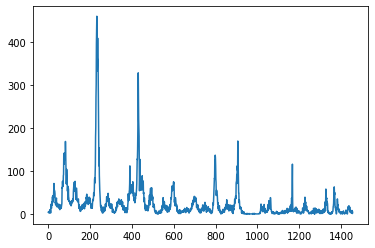

In [0]:
mat.plot(datal["total_cases"])

In [0]:
from statsmodels.tsa.stattools import grangercausalitytests
removenull(datat)

maxlag=12
variables=['city','year','weekofyear','week_start_date','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','precipitation_amt_mm','reanalysis_air_temp_k','reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k','reanalysis_precip_amt_kg_per_m2','reanalysis_relative_humidity_percent','reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg','reanalysis_tdtr_k','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mmsj']
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
ds1=datat[['weekofyear','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','precipitation_amt_mm','reanalysis_air_temp_k','reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k','reanalysis_precip_amt_kg_per_m2','reanalysis_relative_humidity_percent','reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg','reanalysis_tdtr_k','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm']]
print(ds1)
ds2=pd.concat([datat,datal[['total_cases']]],axis=1)
print(ds2)
grangers_causation_matrix(ds2, variables = ds2.columns)   

      weekofyear   ndvi_ne  ...  station_min_temp_c  station_precip_mm
0             18  0.122600  ...                20.0               16.0
1             19  0.169900  ...                22.2                8.6
2             20  0.032250  ...                22.8               41.4
3             21  0.128633  ...                23.3                4.0
4             22  0.196200  ...                23.9                5.8
...          ...       ...  ...                 ...                ...
1451          21  0.342750  ...                22.4               27.0
1452          22  0.160157  ...                21.7               36.6
1453          23  0.247057  ...                19.2                7.4
1454          24  0.333914  ...                21.0               16.0
1455          25  0.298186  ...                22.2               20.4

[1456 rows x 21 columns]
     city  year  weekofyear  ... station_min_temp_c  station_precip_mm  total_cases
0      sj  1990          18  ...      

ValueError: ignored

In [0]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [0]:
for name, column in ds2.iteritems():
    adfuller_test(column,signif=0.05,name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "weekofyear" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.7855
 No. Lags Chosen       = 24
 Critical value 1%     = -3.435
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ndvi_ne" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.8432
 No. Lags Chosen       = 14
 Critical value 1%     = -3.435
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0524. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ndvi_nw" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-St

In [0]:
df_differenced = ds2.diff().dropna()

In [0]:
for name, column in df_differenced.iteritems():
    adfuller_test(column,signif=0.05,name=column.name)
    print('\n')
#df_differenced = df_differenced.diff()


    Augmented Dickey-Fuller Test on "weekofyear" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -38.8515
 No. Lags Chosen       = 0
 Critical value 1%     = -3.435
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ndvi_ne" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.387
 No. Lags Chosen       = 20
 Critical value 1%     = -3.435
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ndvi_nw" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Le

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
model = VAR(df_differenced)
for i in [1,2,3,4,5]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
print(df_differenced)


Lag Order = 1
AIC :  -33.850457251069855
BIC :  -32.01226655574985
FPE :  1.990482765737388e-15
HQIC:  -33.164597104735115 

Lag Order = 2
AIC :  -35.94693473947355
BIC :  -32.34846825156262
FPE :  2.44699975380589e-16
HQIC:  -34.60423966628145 

Lag Order = 3
AIC :  -36.672994523502126
BIC :  -31.31228676455095
FPE :  1.1850794058935192e-16
HQIC:  -34.67268591875267 

Lag Order = 4
AIC :  -37.04150249525477
BIC :  -29.916584397978937
FPE :  8.213969339326965e-17
HQIC:  -34.38280029282024 

Lag Order = 5
AIC :  -36.49489638336967
BIC :  -27.603795282623118
FPE :  1.4234277746720333e-16
HQIC:  -33.17701905195708 

      weekofyear   ndvi_ne  ...  station_precip_mm  total_cases
1            1.0  0.047300  ...               -7.4          1.0
2            1.0 -0.137650  ...               32.8         -1.0
3            1.0  0.096383  ...              -37.4         -1.0
4            1.0  0.067567  ...                1.8          3.0
5            1.0 -0.041650  ...               33.3         

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [0]:
model_fitted = model.fit(4)
model_fitted.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/vector_ar/var_model.py:1431: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self._cov_params()))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 22, Nov, 2019
Time:                     08:55:56
--------------------------------------------------------------------
No. of Equations:         22.0000    BIC:                   -29.9166
Nobs:                     1451.00    HQIC:                  -34.3828
Log likelihood:          -16463.7    FPE:                8.21397e-17
AIC:                     -37.0415    Det(Omega_mle):         0.00000
--------------------------------------------------------------------
Results for equation weekofyear
                                              coefficient            std. error           t-stat            prob
----------------------------------------------------------------------------------------------------------------
const                                           -0.006088              0.185327           -0.033           0.974
L1.weekofyear                           

In [0]:

out = durbin_watson(model_fitted.resid)

for col, val in zip(df_differenced.columns, out):
    print(col, ':', round(val, 2))

weekofyear : 2.02
ndvi_ne : 2.06
ndvi_nw : 2.05
ndvi_se : 2.06
ndvi_sw : 2.05
precipitation_amt_mm : 2.06
reanalysis_air_temp_k : 2.01
reanalysis_avg_temp_k : 2.01
reanalysis_dew_point_temp_k : 2.06
reanalysis_max_air_temp_k : 2.05
reanalysis_min_air_temp_k : 2.05
reanalysis_precip_amt_kg_per_m2 : 2.05
reanalysis_relative_humidity_percent : 2.04
reanalysis_sat_precip_amt_mm : 2.06
reanalysis_specific_humidity_g_per_kg : 2.06
reanalysis_tdtr_k : 2.0
station_avg_temp_c : 2.02
station_diur_temp_rng_c : 2.03
station_max_temp_c : 2.02
station_min_temp_c : 2.06
station_precip_mm : 2.08
total_cases : 2.01


In [0]:
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

4


array([[ 1.00000000e+00, -1.82592900e-01, -1.58528600e-01,
        -1.20300000e-01, -6.68572000e-02,  3.11700000e+01,
        -1.00428571e+00, -1.37857143e+00, -3.72857143e-01,
        -1.20000000e+00, -2.60000000e+00,  1.62100000e+02,
         2.83428571e+00,  3.11700000e+01, -4.15714286e-01,
        -2.32857143e+00, -1.20000000e+00, -1.43333333e+00,
        -7.00000000e-01, -7.00000000e-01,  9.60000000e+00,
         3.00000000e+00],
       [ 1.00000000e+00,  8.69000000e-02, -1.43143000e-02,
         1.14314200e-01,  8.05720000e-03, -2.75300000e+01,
        -1.73142857e+00, -1.80000000e+00, -9.51428572e-01,
        -3.00000000e+00,  5.00000000e-01, -1.56500000e+02,
         2.68000000e+00, -2.75300000e+01, -1.06142857e+00,
         2.85714286e-02, -3.03333333e+00, -3.60000000e+00,
        -2.50000000e+00, -2.50000000e+00, -2.92000000e+01,
        -7.00000000e+00],
       [ 1.00000000e+00,  8.68572000e-02,  9.97143000e-02,
         2.85286000e-02,  9.17714000e-02,  7.30000000e-01,
    

In [0]:
nobs = 20
df_train, df_test = ds2[0:-nobs], ds2[-nobs:]

fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=datat.index[-nobs:], columns=ds2.columns + '_1d')
df_forecast

,weekofyear_1d,ndvi_ne_1d,ndvi_nw_1d,ndvi_se_1d,ndvi_sw_1d,precipitation_amt_mm_1d,reanalysis_air_temp_k_1d,reanalysis_avg_temp_k_1d,reanalysis_dew_point_temp_k_1d,reanalysis_max_air_temp_k_1d,reanalysis_min_air_temp_k_1d,reanalysis_precip_amt_kg_per_m2_1d,reanalysis_relative_humidity_percent_1d,reanalysis_sat_precip_amt_mm_1d,reanalysis_specific_humidity_g_per_kg_1d,reanalysis_tdtr_k_1d,station_avg_temp_c_1d,station_diur_temp_rng_c_1d,station_max_temp_c_1d,station_min_temp_c_1d,station_precip_mm_1d,total_cases_1d
1436,-5.109156,0.000699,-0.016986,0.006877,-0.016427,-21.959546,-0.389615,-0.807090,-0.840103,0.403383,-0.508123,14.625369,-1.772831,-21.959546,-0.824318,-0.857075,-0.787281,0.028116,-0.642752,-1.391055,-35.503823,-4.036847
1437,-0.264958,0.019395,0.037049,0.014489,0.015012,2.626312,-0.414259,-0.326542,-0.244620,0.113955,-0.301342,-8.471564,0.551347,2.626312,-0.260994,-0.529779,-0.437929,-0.211610,-0.094857,-0.517799,28.229227,-2.447348
1438,0.640629,-0.030755,-0.054609,-0.049377,-0.031553,5.150009,0.029996,-0.110653,0.591124,-1.096765,0.560407,17.558817,2.481494,5.150009,0.588838,-0.385927,0.003175,-0.245428,0.390746,0.571062,-5.932510,1.309312
1439,-0.568094,0.000631,0.012616,0.000666,0.011104,11.334403,-0.064914,0.042257,0.122865,0.262060,-0.067533,0.842533,0.890009,11.334403,0.108973,0.120442,0.040994,-0.131640,-0.692843,0.281043,7.914871,-1.419092
1440,0.990467,0.010599,0.020783,0.027606,0.011547,-3.245300,0.157996,0.161445,-0.258630,-0.033529,-0.381190,-8.812783,-1.875485,-3.245300,-0.243553,0.499310,0.145220,0.268508,0.436371,-0.258807,-8.469128,0.640197
1441,-0.282120,0.003078,-0.009759,0.006497,-0.002431,-9.590241,-0.029490,-0.020006,-0.016933,0.206128,0.275893,-2.449301,0.117142,-9.590241,-0.017641,-0.281546,-0.012961,-0.047850,-0.099016,-0.072862,-1.068601,-0.655878
1442,-0.208600,-0.002718,0.005004,-0.014236,-0.005991,1.033099,0.016526,0.019377,-0.000220,0.080829,0.033528,-0.367607,-0.127316,1.033099,-0.003563,0.038739,-0.078940,-0.011366,-0.064609,-0.024050,3.700531,0.195731
1443,-0.254501,-0.002467,-0.011299,-0.003449,0.001263,2.621692,-0.061429,-0.103877,0.020351,-0.136897,-0.073431,5.915597,0.348650,2.621692,0.022323,-0.030591,0.011842,0.012438,0.114889,0.131096,-3.451894,-0.205697
1444,-0.069424,0.000166,0.003149,0.000287,0.001359,3.407576,0.027359,0.048552,0.002200,0.090300,-0.066846,-0.901915,-0.088418,3.407576,-0.000015,0.094798,0.005612,0.002344,-0.076153,-0.028883,3.072999,0.202882
1445,0.160438,0.002407,0.007026,0.008202,0.002190,-1.765653,-0.029112,-0.026087,0.037053,-0.161902,-0.011795,-0.257517,0.315812,-1.765653,0.039627,-0.094282,0.000734,-0.022449,0.041521,-0.052093,0.142265,-0.150807


In [0]:
def invert_transformation(ds2, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = ds2.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
          pass
           # df_fc[str(col)+'_1d'] = (ds2[col].iloc[-1]-ds2[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
         #Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = ds2[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc
df_results = invert_transformation(ds2, df_forecast,second_diff=False)  
print(df_results)      
df_results.loc[:, ['weekofyear_forecast','ndvi_ne_forecast','ndvi_nw_forecast','ndvi_se_forecast','ndvi_sw_forecast','precipitation_amt_mm_forecast','reanalysis_air_temp_k_forecast','reanalysis_avg_temp_k_forecast','reanalysis_dew_point_temp_k_forecast','reanalysis_max_air_temp_k_forecast','reanalysis_min_air_temp_k_forecast','reanalysis_precip_amt_kg_per_m2_forecast','reanalysis_relative_humidity_percent_forecast','reanalysis_sat_precip_amt_mm_forecast','reanalysis_specific_humidity_g_per_kg_forecast','reanalysis_tdtr_k_forecast','station_avg_temp_c_forecast','station_diur_temp_rng_c_forecast','station_max_temp_c_forecast','station_min_temp_c_forecast','station_precip_mm_forecast','total_cases_forecast']]

      weekofyear_1d  ...  total_cases_forecast
1436      -5.109156  ...             -0.036847
1437      -0.264958  ...             -2.484194
1438       0.640629  ...             -1.174882
1439      -0.568094  ...             -2.593975
1440       0.990467  ...             -1.953778
1441      -0.282120  ...             -2.609656
1442      -0.208600  ...             -2.413925
1443      -0.254501  ...             -2.619622
1444      -0.069424  ...             -2.416740
1445       0.160438  ...             -2.567547
1446       0.165525  ...             -2.723083
1447      -0.152357  ...             -2.704760
1448      -0.029567  ...             -2.572008
1449      -0.033876  ...             -2.573231
1450       0.010434  ...             -2.689188
1451       0.056414  ...             -2.728576
1452      -0.038414  ...             -2.685711
1453      -0.012488  ...             -2.655420
1454      -0.013420  ...             -2.687573
1455       0.000276  ...             -2.722459

[20 rows x 4

,weekofyear_forecast,ndvi_ne_forecast,ndvi_nw_forecast,ndvi_se_forecast,ndvi_sw_forecast,precipitation_amt_mm_forecast,reanalysis_air_temp_k_forecast,reanalysis_avg_temp_k_forecast,reanalysis_dew_point_temp_k_forecast,reanalysis_max_air_temp_k_forecast,reanalysis_min_air_temp_k_forecast,reanalysis_precip_amt_kg_per_m2_forecast,reanalysis_relative_humidity_percent_forecast,reanalysis_sat_precip_amt_mm_forecast,reanalysis_specific_humidity_g_per_kg_forecast,reanalysis_tdtr_k_forecast,station_avg_temp_c_forecast,station_diur_temp_rng_c_forecast,station_max_temp_c_forecast,station_min_temp_c_forecast,station_precip_mm_forecast,total_cases_forecast
1436,19.890844,0.298884,0.215985,0.281091,0.299330,41.260454,297.707528,299.028624,294.967039,308.203383,291.791877,51.525369,87.310026,41.260454,16.531396,10.157211,26.687719,9.928116,33.057248,20.808945,-15.103823,-0.036847
1437,19.625887,0.318279,0.253034,0.295579,0.314342,43.886766,297.293269,298.702082,294.722419,308.317337,291.490535,43.053804,87.861373,43.886766,16.270403,9.627432,26.249789,9.716506,32.962391,20.291146,13.125403,-2.484194
1438,20.266515,0.287525,0.198424,0.246203,0.282788,49.036774,297.323264,298.591429,295.313543,307.220573,292.050941,60.612622,90.342867,49.036774,16.859241,9.241505,26.252964,9.471078,33.353138,20.862207,7.192893,-1.174882
1439,19.698421,0.288155,0.211040,0.246869,0.293892,60.371178,297.258350,298.633686,295.436408,307.482632,291.983409,61.455155,91.232876,60.371178,16.968214,9.361947,26.293958,9.339438,32.660295,21.143250,15.107764,-2.593975
1440,20.688888,0.298754,0.231823,0.274475,0.305439,57.125878,297.416347,298.795131,295.177778,307.449104,291.602219,52.642371,89.357391,57.125878,16.724661,9.861257,26.439178,9.607946,33.096666,20.884443,6.638635,-1.953778
1441,20.406768,0.301833,0.222064,0.280972,0.303008,47.535636,297.386857,298.775126,295.160845,307.655232,291.878112,50.193070,89.474532,47.535636,16.707021,9.579712,26.426217,9.560096,32.997651,20.811582,5.570035,-2.609656
1442,20.198168,0.299115,0.227068,0.266736,0.297017,48.568735,297.403383,298.794503,295.160625,307.736061,291.911640,49.825464,89.347216,48.568735,16.703458,9.618451,26.347277,9.548730,32.933042,20.787532,9.270566,-2.413925
1443,19.943667,0.296647,0.215769,0.263286,0.298280,51.190428,297.341954,298.690626,295.180976,307.599164,291.838209,55.741061,89.695867,51.190428,16.725781,9.587861,26.359119,9.561168,33.047930,20.918628,5.818672,-2.619622
1444,19.874243,0.296813,0.218918,0.263573,0.299640,54.598004,297.369313,298.739177,295.183176,307.689465,291.771363,54.839146,89.607448,54.598004,16.725766,9.682659,26.364731,9.563513,32.971777,20.889745,8.891671,-2.416740
1445,20.034681,0.299221,0.225944,0.271775,0.301830,52.832351,297.340200,298.713090,295.220228,307.527563,291.759568,54.581629,89.923260,52.832351,16.765393,9.588377,26.365465,9.541064,33.013298,20.837652,9.033936,-2.567547
